# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?
Review criteriaменьше 
Решение должно представлять собой IPython-ноутбук, содержащий:

- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.

In [41]:
import scipy as sp
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-notebook')

Мы будем рассматривать chi2-распределение со степенью свободы равном 5. </br>

Создатим выборку объема n = 1000 и построим: 
    - гистограмму
    - теоретическое распределение

In [71]:
n = 1000
chi2_ = stats.chi2(5)
x_chi = chi2_.rvs(n) 
print 'Shape', x_chi.shape

Shape (1000L,)


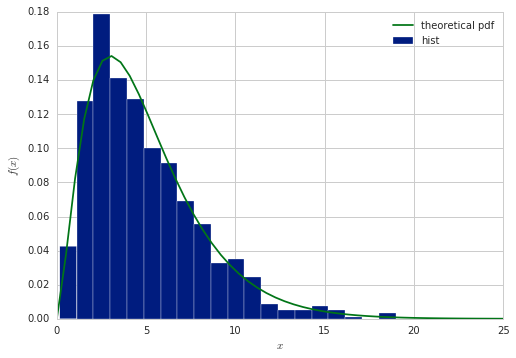

In [72]:
plt.hist(x_chi, bins = 20, label='hist', normed = True) # гистограмма выборки

x = np.linspace(0, 25)
pdf = chi2_.pdf(x) # теор.плотность вероятности
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Как мы видим, гистограмма и теоретическая оценка практически совпадают.

Создадим функцию для вычислений и генерирования графика при разных значениях n.

- Дисперсия: $\sigma^2$ = 2k
- Математическое ожидание: $\mu = k$ 
- По ЦПТ: $N(EX,\frac{DX}{n})$ - нормальное распределение, аппроксимирующее распределение выборочных средних ->  $ N(k, \frac{2k}{n})$

In [3]:
def task_Chi(n):
    means = []
    for i in range(1000):
        s = chi2_.rvs(n)
        means.append(np.mean(s)) # выборочное среднее
    
    plt.hist(means, bins = 20, label='hist', normed = True) # гистограмма выборки
    
    x = np.linspace(0, 25)
    norm_rv = stats.norm(chi2_.mean(), np.sqrt(chi2_.var() / float(n)))  
    pdf = norm_rv.pdf(x) # теор.плотность вероятности
    plt.plot(x, pdf, label='theoretical pdf')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

In [4]:
for i in [5,10,50]:
    task_Chi(i)

NameError: global name 'chi2_' is not defined

**Выводы:** 
- с ростом n растёт точность: при n = 5 и n = 10 разница практически не заметна, однако при n = 50 видны существенные отличия
- использование распределния хи-квадрат позволяет успешно аппроксимировать функцию